In [31]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [32]:
import zipfile
import os

zip_path = '/content/drive/MyDrive/train.zip'
extract_path = '.'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print(f"'{zip_path}' extracted to '{extract_path}'")

'/content/drive/MyDrive/train.zip' extracted to '.'


In [33]:
import zipfile
import os

zip_path = '/content/drive/MyDrive/valid.zip'
extract_path = '.'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print(f"'{zip_path}' extracted to '{extract_path}'")

'/content/drive/MyDrive/valid.zip' extracted to '.'


In [34]:
import zipfile
import os

zip_path = '/content/drive/MyDrive/test.zip'
extract_path = '.'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print(f"'{zip_path}' extracted to '{extract_path}'")

'/content/drive/MyDrive/test.zip' extracted to '.'


In [35]:
os.listdir('.')

['.config',
 '__MACOSX',
 'valid',
 'drive',
 'test',
 'organized_data',
 'model.keras',
 'train',
 'sample_data']

# Task
Extract the files from the zip file located at "https://drive.google.com/drive/u/1/home/train.zip", "https://drive.google.com/drive/u/1/home/valid.zip", and "https://drive.google.com/drive/u/1/home/test.zip" on Google Drive. Then, organize the extracted files into separate directories based on the following classes: 'Cavity', 'Fillings', 'Impacted Tooth', 'Implant', and 'Normal'.

## Identify relevant directories

### Subtask:
Determine the root directories where the zip files were extracted (`train`, `valid`, `test`).


**Reasoning**:
List the contents of the current directory to identify the extracted folders and confirm the presence of the required directories.



In [36]:
print(os.listdir('.'))

['.config', '__MACOSX', 'valid', 'drive', 'test', 'organized_data', 'model.keras', 'train', 'sample_data']


## Iterate through directories and classes

### Subtask:
Iterate through each of the identified directories (`train`, `valid`, `test`) and, within each directory, iterate through the expected classes (`Cavity`, `Fillings`, `Impacted Tooth`, `Implant`, and `Normal`).


**Reasoning**:
Create lists for root directories and expected classes, then use nested loops to iterate through them and print the path for each class within each directory.



In [37]:
root_dirs = ['train', 'valid', 'test']
expected_classes = ['Cavity', 'Fillings', 'Impacted Tooth', 'Implant', 'Normal']

for root_dir in root_dirs:
    print(f"Processing directory: {root_dir}")
    for class_name in expected_classes:
        class_path = os.path.join(root_dir, class_name)
        print(f"  Checking class directory: {class_path}")

Processing directory: train
  Checking class directory: train/Cavity
  Checking class directory: train/Fillings
  Checking class directory: train/Impacted Tooth
  Checking class directory: train/Implant
  Checking class directory: train/Normal
Processing directory: valid
  Checking class directory: valid/Cavity
  Checking class directory: valid/Fillings
  Checking class directory: valid/Impacted Tooth
  Checking class directory: valid/Implant
  Checking class directory: valid/Normal
Processing directory: test
  Checking class directory: test/Cavity
  Checking class directory: test/Fillings
  Checking class directory: test/Impacted Tooth
  Checking class directory: test/Implant
  Checking class directory: test/Normal


## Locate and process files

### Subtask:
For each class within each directory, find the corresponding files.


**Reasoning**:
Iterate through the directories and classes, list files in each class directory, filter for files, and print their paths.



In [38]:
root_dirs = ['train', 'valid', 'test']
expected_classes = ['Cavity', 'Fillings', 'Impacted Tooth', 'Implant', 'Normal']

for root_dir in root_dirs:
    print(f"Processing directory: {root_dir}")
    for class_name in expected_classes:
        class_path = os.path.join(root_dir, class_name)
        print(f"  Checking class directory: {class_path}")
        if os.path.exists(class_path):
            items_in_class_dir = os.listdir(class_path)
            files_in_class_dir = [item for item in items_in_class_dir if os.path.isfile(os.path.join(class_path, item))]
            print(f"    Found {len(files_in_class_dir)} files:")
            for file_name in files_in_class_dir:
                file_path = os.path.join(class_path, file_name)
                print(f"      {file_path}")
        else:
            print(f"    Class directory not found: {class_path}")


Streaming output truncated to the last 5000 lines.
      train/Normal/0833_jpg.rf.944a3a7acefe71c446313a02ae267128_segment_21.png
      train/Normal/0461_jpg.rf.32aac00098e9e74ae07b55e543a0d3ff_segment_21.png
      train/Normal/0119_jpg.rf.3ff39113deff8194de26a7e51d9d1a31_segment_16.png
      train/Normal/0083_jpg.rf.53ef5461bb01354a5743cbb903274059_segment_50.png
      train/Normal/0333_jpg.rf.a7dada8328229a84c76eb3e259947079_segment_23.png
      train/Normal/0742_jpg.rf.585c0dc539e85ccca25634ddcc483dd1_segment_11.png
      train/Normal/0042_jpg.rf.73cc4a79fced08320315ccd42aa06a25_segment_22.png
      train/Normal/0412_jpg.rf.44c4ec73ab72b24102be75f2098536d5_segment_53.png
      train/Normal/0718_jpg.rf.6ecb763ae7d2ab9765075c76aa6fd967_segment_16.png
      train/Normal/0255_jpg.rf.6cc810ba280add3ba1b78a59cf2faf41_segment_14.png
      train/Normal/0024_jpg.rf.b911ffce5a49f6b6a7965de66c4a82e6_segment_13.png
      train/Normal/0675_jpg.rf.42f4255efb02410004618f5f2d5719b0_segment_13.png
 

## Organize extracted files

### Subtask:
Copy or move the files belonging to each class to a new directory structure that reflects the classes.


**Reasoning**:
Define the target directory structure and create the base directory for the organized data.



In [39]:
import os
import shutil

target_base_dir = 'organized_data'
os.makedirs(target_base_dir, exist_ok=True)

root_dirs = ['train', 'valid', 'test']
expected_classes = ['Cavity', 'Fillings', 'Impacted Tooth', 'Implant', 'Normal']

for root_dir in root_dirs:
    for class_name in expected_classes:
        source_class_dir = os.path.join(root_dir, class_name)
        target_class_dir = os.path.join(target_base_dir, root_dir, class_name)

        os.makedirs(target_class_dir, exist_ok=True)

        if os.path.exists(source_class_dir):
            for item_name in os.listdir(source_class_dir):
                source_item_path = os.path.join(source_class_dir, item_name)
                target_item_path = os.path.join(target_class_dir, item_name)

                if os.path.isfile(source_item_path):
                    shutil.move(source_item_path, target_item_path)
                    print(f"Moved: {source_item_path} to {target_item_path}")

Streaming output truncated to the last 5000 lines.
Moved: train/Normal/0066_jpg.rf.ef19ffd9d9e9ee6a94b1ce84598a0393_segment_23.png to organized_data/train/Normal/0066_jpg.rf.ef19ffd9d9e9ee6a94b1ce84598a0393_segment_23.png
Moved: train/Normal/0450_jpg.rf.514c0998f6c8d952fe34069e8dcdbd78_segment_24.png to organized_data/train/Normal/0450_jpg.rf.514c0998f6c8d952fe34069e8dcdbd78_segment_24.png
Moved: train/Normal/0106_jpg.rf.7c63d232bd1781daa8ae06f1e2511100_segment_19.png to organized_data/train/Normal/0106_jpg.rf.7c63d232bd1781daa8ae06f1e2511100_segment_19.png
Moved: train/Normal/0616_jpg.rf.3912d92df465b92148e4b95b9c11f9a0_segment_20.png to organized_data/train/Normal/0616_jpg.rf.3912d92df465b92148e4b95b9c11f9a0_segment_20.png
Moved: train/Normal/0343_jpg.rf.a27ab77328088a8509525cb2e2bccb73_segment_21.png to organized_data/train/Normal/0343_jpg.rf.a27ab77328088a8509525cb2e2bccb73_segment_21.png
Moved: train/Normal/0719_jpg.rf.041f488043af405b5b8431efc3d8f157_segment_30.png to organized_d

## Verify the organization

### Subtask:
Check the new directory structure to ensure the files are correctly organized.


**Reasoning**:
Check the organized data structure by listing the contents of the created directories and sampling files.



In [40]:
import os

organized_data_dir = 'organized_data'
root_dirs = ['train', 'valid', 'test']
expected_classes = ['Cavity', 'Fillings', 'Impacted Tooth', 'Implant', 'Normal']

print(f"Contents of base organized_data directory: {os.listdir(organized_data_dir)}")

for root_dir in root_dirs:
    root_path = os.path.join(organized_data_dir, root_dir)
    print(f"\nContents of {root_path} directory: {os.listdir(root_path)}")
    for class_name in expected_classes:
        class_path = os.path.join(root_path, class_name)
        print(f"  Checking class directory: {class_path}")
        if os.path.exists(class_path):
            items_in_class_dir = os.listdir(class_path)
            files_in_class_dir = [item for item in items_in_class_dir if os.path.isfile(os.path.join(class_path, item))]
            print(f"    Found {len(files_in_class_dir)} files.")
            if files_in_class_dir:
                print("    Sample files:")
                for file_name in files_in_class_dir[:5]:
                    print(f"      {file_name}")
            else:
                print("    No files found in this class directory.")
        else:
            print(f"    Class directory not found: {class_path}")


Contents of base organized_data directory: ['valid', 'test', 'train']

Contents of organized_data/train directory: ['Fillings', 'Normal', 'Cavity', 'Impacted Tooth', 'Implant']
  Checking class directory: organized_data/train/Cavity
    Found 576 files.
    Sample files:
      0400_jpg.rf.43874f272128dcc1b112031537f982e8_segment_5233.png
      0434_jpg.rf.983cdb4ed75edf00e84ce2c58c84df49_segment_4019.png
      0685_jpg.rf.5bb224ce77b968f04822bedaa1a0db67_segment_6007.png
      0400_jpg.rf.a6b1f6ab8fa5be020dbb72193dcd4208_segment_6362.png
      0550_jpg.rf.b53b49c41fc9b7eb9d9ae5ab0d4b47b4_segment_6726.png
  Checking class directory: organized_data/train/Fillings
    Found 5242 files.
    Sample files:
      0363_jpg.rf.77aa662081f0582a8d18475f9ffebe1a_segment_3037.png
      0506_jpg.rf.83612ce7152d13e40324f1348a8241f3_segment_3559.png
      0208_jpg.rf.a514e196743c03a506fe526fda728ff2_segment_6283.png
      0328_jpg.rf.f69c579b68e9e0c0e6990d813920820f_segment_831.png
      0605_jpg.rf.6

## Summary:

### Data Analysis Key Findings

*   The zip files were successfully extracted into `train`, `valid`, and `test` root directories.
*   Files were successfully organized into a new directory structure under `organized_data`, with subdirectories for `train`, `valid`, and `test`, and then further subdirectories for each class: 'Cavity', 'Fillings', 'Impacted Tooth', 'Implant', and 'Normal'.
*   The verification step confirmed that files are present in the expected class-based directories within the `organized_data` structure.

### Insights or Next Steps

*   The data is now prepared and organized for use in a machine learning model for image classification.
*   The next steps should involve loading this organized data for model training, validation, and testing.


In [41]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import array_to_img, img_to_array, load_img

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input, Rescaling, Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()

# Define the input shape explicitly using Input
model.add(Input(shape=(64, 64, 1)))

# Rescaling layer for grayscale images
model.add(layers.Rescaling(1./255))

# First Convolutional Block
model.add(layers.Conv2D(filters=32, kernel_size=(3, 3), activation="relu", padding="same"))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

# Second Convolutional Block
model.add(layers.Conv2D(filters=32, kernel_size=(3, 3), activation="relu", padding="same"))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

# Third Convolutional Block
model.add(layers.Conv2D(filters=64, kernel_size=(3, 3), activation="relu", padding="same"))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

# Fourth Convolutional Block
model.add(layers.Conv2D(filters=128, kernel_size=(3, 3), activation="relu", padding="same"))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

# Flattening the output
model.add(layers.Flatten())

# Fully Connected Dense Layer
model.add(layers.Dense(64, activation="relu"))

# Dropout Layer for regularization
model.add(layers.Dropout(0.5))

# Output Layer with Softmax
model.add(layers.Dense(5, activation="softmax"))

In [42]:
adam = optimizers.Adam(learning_rate = 0.001)
model.compile(loss='categorical_crossentropy',
              optimizer= adam,
              metrics=['accuracy'])

In [43]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_2 (Rescaling)         │ (None, 64, 64, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 64, 64, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │       131,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 5)              │           325 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 233,381 (911.64 KB)

 Trainable params: 233,381 (911.64 KB)

 Non-trainable params: 0 (0.00 B)

In [44]:
batch_size = 32
from tensorflow.keras.preprocessing import image_dataset_from_directory
import os

# Define the paths to the organized data directories
organized_data_dir = 'organized_data'
train_data_dir = os.path.join(organized_data_dir, 'train')
valid_data_dir = os.path.join(organized_data_dir, 'valid')
test_data_dir = os.path.join(organized_data_dir, 'test')

# Load the training data
train_ds = image_dataset_from_directory(
    train_data_dir,
    label_mode='categorical',
    #class_names=['Cavity', 'Fillings', 'Impacted Tooth', 'Implant', 'Normal'],
    color_mode='grayscale',
    batch_size=batch_size,
    image_size=(64, 64)
)

# Load the validation data
valid_ds = image_dataset_from_directory(
    valid_data_dir,
    label_mode='categorical',
    #class_names=['Cavity', 'Fillings', 'Impacted Tooth', 'Implant', 'Normal'],
    color_mode='grayscale',
    batch_size=batch_size,
    image_size=(64, 64)
)

# Load the test data
test_ds = image_dataset_from_directory(
    test_data_dir,
    label_mode='categorical',
    #class_names=['Cavity', 'Fillings', 'Impacted Tooth', 'Implant', 'Normal'],
    color_mode='grayscale',
    batch_size=batch_size,
    image_size=(64, 64)
)

Found 25136 files belonging to 5 classes.
Found 2812 files belonging to 5 classes.
Found 1649 files belonging to 5 classes.


In [45]:
class_names = train_ds.class_names
print(class_names)

MODEL = "model"

modelCheckpooint = callbacks.ModelCheckpoint("{}.keras".format(MODEL), monitor="val_loss", verbose=1, save_best_only=True)

LRreducer = callbacks.ReduceLROnPlateau(monitor="val_loss", factor = 0.1, patience=3, verbose=1, min_lr=0)

EarlyStopper = callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)

['Cavity', 'Fillings', 'Impacted Tooth', 'Implant', 'Normal']


In [46]:
train_ds

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 64, 64, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None, 5), dtype=tf.float32, name=None))>

In [47]:
%%time
from tensorflow.keras import optimizers

# Compile the model (moved from cell woYokzD8TMdE)
adam = optimizers.Adam(learning_rate = 0.001)
model.compile(loss='categorical_crossentropy',
              optimizer= adam,
              metrics=['accuracy'])

history = model.fit(
        train_ds,
        epochs=30,
        validation_data=valid_ds,
        callbacks = [modelCheckpooint, LRreducer, EarlyStopper])

Epoch 1/30
566/786 ━━━━━━━━━━━━━━━━━━━━ 48s 220ms/step - accuracy: 0.6845 - loss: 0.9020

KeyboardInterrupt: 

In [48]:
def plot_history(history):
    fig, ax = plt.subplots(1, 2, figsize=(15,5))
    ax[0].set_title('loss')
    ax[0].plot(history.epoch, history.history["loss"], label="Train loss")
    ax[0].plot(history.epoch, history.history["val_loss"], label="Validation loss")
    ax[1].set_title('accuracy')
    ax[1].plot(history.epoch, history.history["accuracy"], label="Train acc")
    ax[1].plot(history.epoch, history.history["val_accuracy"], label="Validation acc")
    ax[0].legend()
    ax[1].legend()

In [49]:
def plot_compare_history(history, name_history, history_1, name_history_1):

    fig, ax = plt.subplots(1, 2, figsize=(15,5))

    ax[0].set_title('loss')

    ax[0].plot(history.epoch, history.history["loss"], label="Train loss " + name_history)
    ax[0].plot(history.epoch, history.history["val_loss"], label="Validation loss " + name_history)

    ax[0].plot(history_1.epoch, history_1.history["loss"], label="Train loss " + name_history_1)
    ax[0].plot(history_1.epoch, history_1.history["val_loss"], label="Validation loss " + name_history_1)

    ax[1].set_title('Accuracy')

    ax[1].plot(history.epoch, history.history["accuracy"], label="Train Accuracy " + name_history)
    ax[1].plot(history.epoch, history.history["val_accuracy"], label="Validation Accuracy " + name_history)

    ax[1].plot(history_1.epoch, history_1.history["accuracy"], label="Train Accuracy " + name_history_1)
    ax[1].plot(history_1.epoch, history_1.history["val_accuracy"], label="Validation Accuracy " + name_history_1)

    ax[0].legend()
    ax[1].legend()

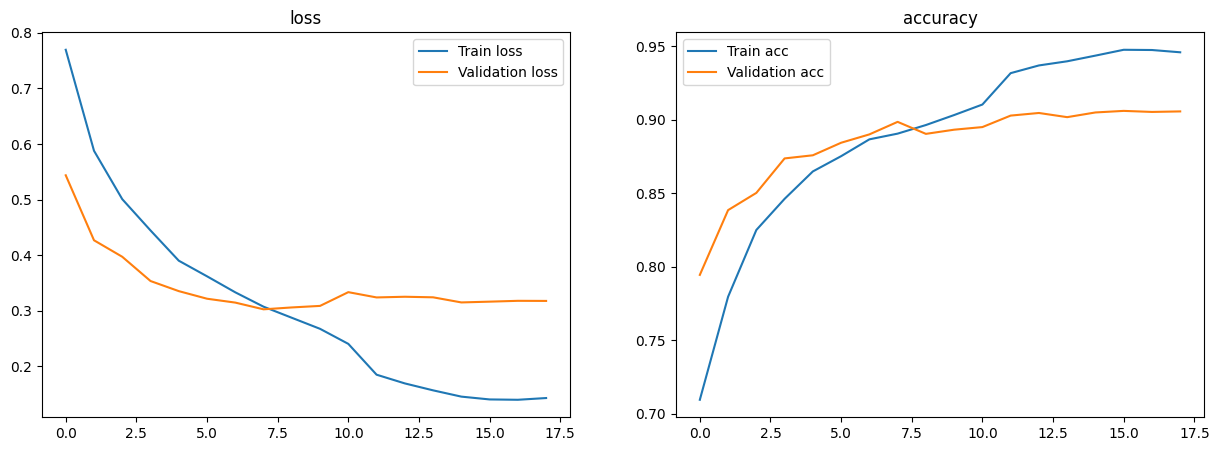

In [50]:
plot_history(history)